<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Codificación superdensa y Teleportación</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>19/02/2024</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>

---

<h1><font color="#004D7F" size=15>Codificación superdensa</font></h1>

 - Este algoritmo permite enviar 2 bits de información utilizando un único qubit.

 - Para ello se utiliza un recurso entrelazado, es decir, 2 qubits entrelazados de los cuales solo 1 de ellos se envía.

 - Estos 2 qubits entrelazados usados en el algoritmo se conocen como par EPR.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Se genera un par EPR aplicando una puerta Hadamard al primer qubit y posteriormente una puerta CNOT controlada por el primer qubit y con objetivo en el segundo.
2. Se reparten los qubits a cada una de las partes (emisor y receptor).
3. El emisor que quiere enviar el mensaje $(b_{1}, b_{0})$ aplica a su qubit una puerta X si $b_{1}==1$ y una puerta Z si $b_{0}==1$ y posteriormente lo envía al receptor.
4. El receptor, al recibirlo, aplica una puerta CNOT controlada por el qubit del emisor y con objetivo el qubit de receptor. Después aplica una puerta Hadamard al qubit del emisor.
5. Por último, mide ambos qubits y obtendrá $b_{1}$ en el resultado de la medición del qubit del receptor y $b_{0}$ en el resultado del qubit del emisor.
<img src="./files/esquema-superdense.png" alt="Circuito Superdenso" align="left">

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Enviar el mensaje $(b_{1}, b_{0})=(1,0)$ con un único qubit y verificar que llega al receptor correctamente.

## Arriba **más** significativo

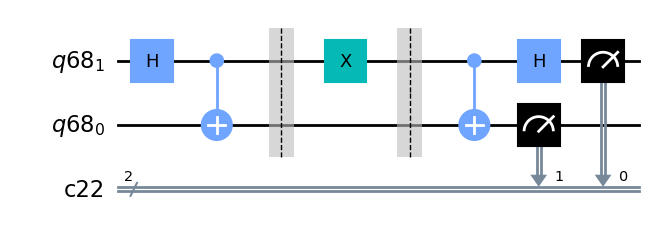

{'10': 100}


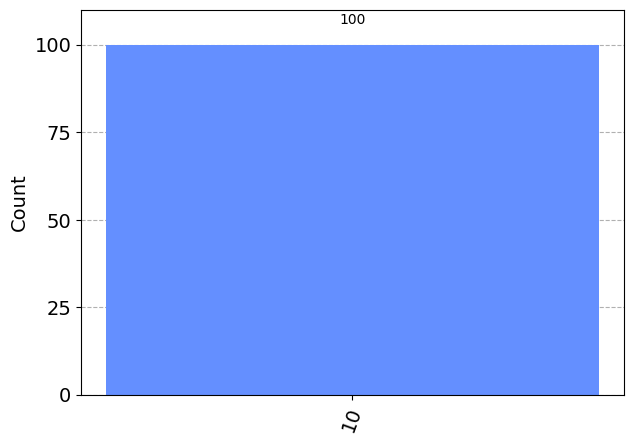

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

#Creamos el circuito de Codificación Superdensa
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

message = [1, 0]
#qubit 1 -> sender
#qubit 0 -> receiver

superdense_circ = QuantumCircuit(qreg, creg)
superdense_circ.h(qreg[1])
superdense_circ.cx(qreg[1], qreg[0])

superdense_circ.barrier()

if message[0] == 1:
    superdense_circ.x(qreg[1])

if message[1] == 1:
    superdense_circ.z(qreg[1])

superdense_circ.barrier()

superdense_circ.cx(qreg[1], qreg[0])
superdense_circ.h(qreg[1])

#Mediciones
superdense_circ.measure(qreg[1], creg[0])
superdense_circ.measure(qreg[0], creg[1])

display(superdense_circ.draw(output='mpl', reverse_bits=True))

job = execute(superdense_circ, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(superdense_circ)

print(counts)
plot_histogram(counts)

<img src="./files/esquema-superdense.png" alt="Circuito Superdenso" align="left">

## Arriba **menos** significativo

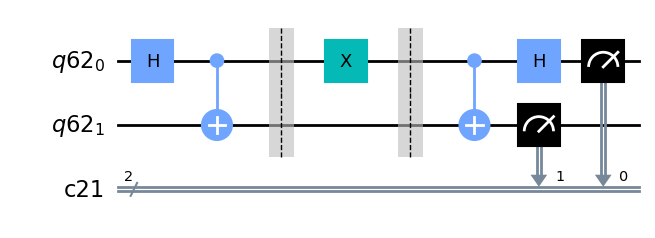

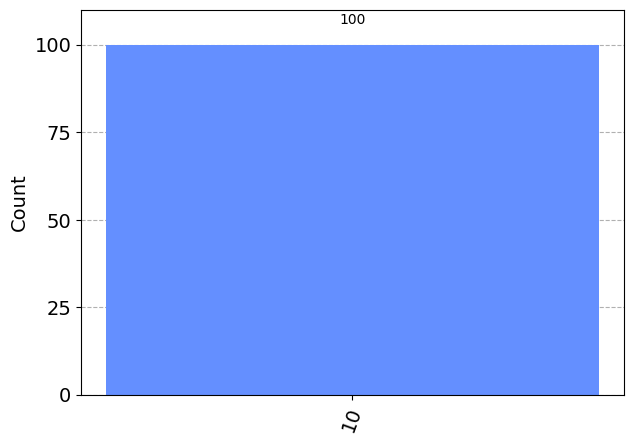

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

#Creamos el circuito de Codificación Superdensa
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

message = [1, 0]
#qubit 1 -> sender
#qubit 0 -> receiver

superdense_circ_2 = QuantumCircuit(qreg, creg)
superdense_circ_2.h(qreg[0])
superdense_circ_2.cx(qreg[0], qreg[1])

superdense_circ_2.barrier()

if message[0] == 1:
    superdense_circ_2.x(qreg[0])

if message[1] == 1:
    superdense_circ_2.z(qreg[0])

superdense_circ_2.barrier()

superdense_circ_2.cx(qreg[0], qreg[1])
superdense_circ_2.h(qreg[0])

#superdense_circ_2.measure(qreg, creg)
superdense_circ_2.measure(qreg[1], creg[1])
superdense_circ_2.measure(qreg[0], creg[0])

display(superdense_circ_2.draw(output='mpl', reverse_bits=False))

job = execute(superdense_circ_2, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(superdense_circ_2)

plot_histogram(counts)

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Generar un mensaje aleatorio con random.random(), enviar el mensaje $(b_{1}, b_{0})$ con un único qubit y verificar que llega al emisor correctamente.

El mensaje es:  0 1


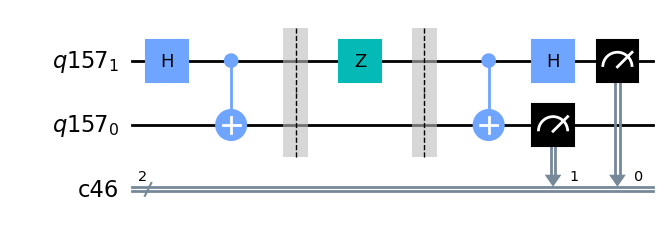

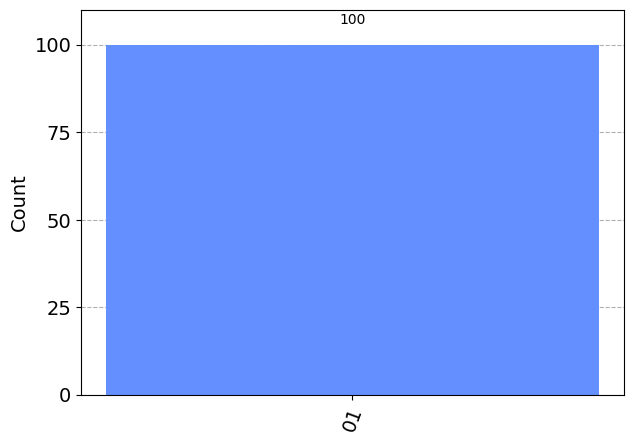

In [55]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import random

random.seed(12)

#Creamos el circuito de Codificación Superdensa
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
superdense_circ_random = QuantumCircuit(qreg, creg)

#Creamos las variables con el mensaje
b0 = random.randint(0, 1)
b1 = round(random.random())

print("El mensaje es: ", b1, b0)

superdense_circ_random.h(qreg[1])
superdense_circ_random.cx(qreg[1], qreg[0])
superdense_circ_random.barrier()

if b1 == 1:
    superdense_circ_random.x(qreg[1])

if b0 == 1:
    superdense_circ_random.z(qreg[1])

superdense_circ_random.barrier()

superdense_circ_random.cx(qreg[1], qreg[0])
superdense_circ_random.h(qreg[1])

#Mediciones
superdense_circ_random.measure(qreg[1], creg[0])
superdense_circ_random.measure(qreg[0], creg[1])

display(superdense_circ_random.draw(output='mpl', reverse_bits=True))

job = execute(superdense_circ_random, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(superdense_circ_random)

plot_histogram(counts)

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Enviar una cadena de bits de tamaño $2n$, generada aleatoriamente, mediante el algoritmo de Codificación superdensa y reconstruirla en el receptor.

In [61]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import random
random.seed(0)
n = 10
message = [round(random.random()) for i in range(2*n)]
print("El mensaje enviado es: ", message)

#Creamos la función del circuito de teleportación
def superdense(b1, b0):
    qreg = QuantumRegister(2)
    creg = ClassicalRegister(2)
    superdense_circ = QuantumCircuit(qreg, creg)
    
    superdense_circ.h(qreg[1])
    superdense_circ.cx(qreg[1], qreg[0])
    superdense_circ.barrier()
    
    if b1 == 1:
        superdense_circ.x(qreg[1])
    
    if b0 == 1:
        superdense_circ.z(qreg[1])
    
    superdense_circ.barrier()
    
    superdense_circ.cx(qreg[1], qreg[0])
    superdense_circ.h(qreg[1])
    
    #Mediciones
    superdense_circ.measure(qreg[1], creg[0])
    superdense_circ.measure(qreg[0], creg[1])

    return superdense_circ
message_received = []
#Aplicamos la función x veces
for i in range(n):
    b1 = message[2*i]
    b0 = message[2*i + 1]
    circ = superdense(b1, b0)

    job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1)
    counts = job.result().get_counts(circ)
    partial_msg = list(counts.keys())[0]
    b1_recibido = int(partial_msg[0])
    b0_recibido = int(partial_msg[1])
    message_received.append(b1_recibido)
    message_received.append(b0_recibido)

print("El mensaje recibido es: ", message_received)

El mensaje enviado es:  [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
El mensaje recibido es:  [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


<h1><font color="#004D7F" size=15>Teleportación</font></h1>

 - Este algoritmo permite enviar información cuántica desde un emisor a un receptor que están separados a una distancia arbitraria.

 - Para completar la teleportación de información cuántica, tiene que enviarse información clásica por un medio clásico.

 - Usa una técnica parecida al algoritmo de Codificación superdensa con un par EPR.
 
 - El algoritmo consta de 3 qubits:
     - El qubit con el estado cuántico que se desea enviar (mensaje).
     - El qubit que usa el emisor para enviar el mensaje.
     - El qubit que usa el receptor para recibir el mensaje.

<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Se codifica en el primer qubit el mensaje que se desea enviar.
2. Se genera un par EPR en el segundo y tercer qubit aplicando una puerta Hadamard al segundo qubit y posteriormente una puerta CNOT controlada por el segundo qubit y con objetivo en el tercero.
3. Posteriormente se reparten los qubits a cada una de las partes (emisor y receptor).
4. El emisor aplica una puerta CNOT, controlada por el qubit del mensaje y con objetivo el qubit de transmisión (segundo), y posteriormente, una puerta Hadamard al qubit del mensaje (primero).
5. El emisor mide el qubit del mensaje (primero) y el qubit de transmisión (segundo) y el resultado se lo comunica por un canal clásico al receptor.
6. El receptor aplica una puerta X a su qubit si la medida del qubit de transmisión (segundo) es 1 y una puerta Z si la medida del qubit del mensaje (primero) es 1.
<img src="./files/esquema-teleportation.png" alt="Circuito Teleportación" align="center">

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Generar un estado cuántico aleatorio a partir de 3 ángulos aleatorios, enviar el mensaje cuántico con solo 2 bits clásicos y verificar que llega al emisor correctamente viendo el estado final resultante.

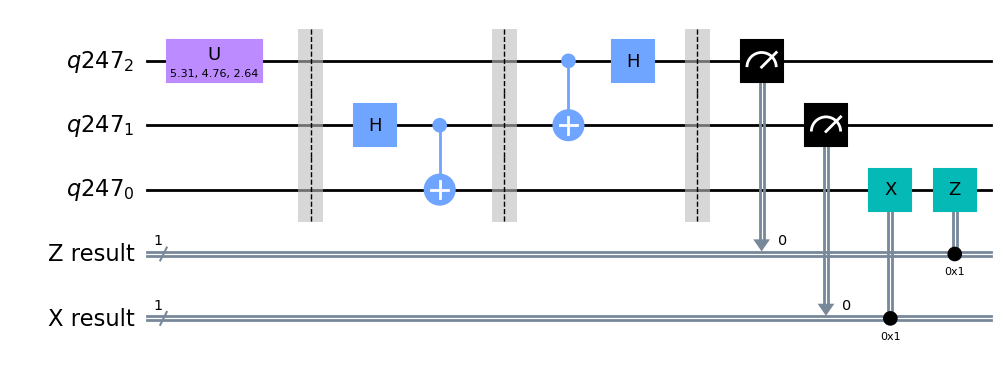

Mensaje enviado:  Statevector([-0.88291427-2.83966887e-16j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.02345708-4.68947929e-01j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))
Mensaje recibido:  Statevector([ 0.        -0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.88291427-2.83966887e-16j,  0.02345708-4.68947929e-01j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j],
            dims=(2, 2, 2))


In [74]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
import random
import numpy as np

random.seed(0)

#Generamos el mensaje aleatoriamente
theta = random.random() * 2 * np.pi
phi = random.random() * 2 * np.pi
lam = random.random() * 2 * np.pi

#Creamos el circuito de Teleportación
teleportation_registry = QuantumRegister(3)
result_registry_x = ClassicalRegister(1, name="X result")
result_registry_z = ClassicalRegister(1, name="Z result")

teleportation_circ = QuantumCircuit(teleportation_registry, result_registry_x, result_registry_z)
    
#Codificamos el mensaje en el qubit 2 (primero)
teleportation_circ.u(theta, phi, lam, teleportation_registry[2])

job = execute(teleportation_circ, Aer.get_backend('statevector_simulator'), shots=1)
message_1 = job.result().get_statevector(teleportation_circ)

teleportation_circ.barrier()
teleportation_circ.h(teleportation_registry[1])
teleportation_circ.cx(teleportation_registry[1], teleportation_registry[0])

teleportation_circ.barrier()

teleportation_circ.cx(teleportation_registry[2], teleportation_registry[1])
teleportation_circ.h(teleportation_registry[2])
teleportation_circ.barrier()

teleportation_circ.measure(teleportation_registry[2], result_registry_z)
teleportation_circ.measure(teleportation_registry[1], result_registry_x)

teleportation_circ.x(teleportation_registry[0]).c_if(result_registry_x, 1)
teleportation_circ.z(teleportation_registry[0]).c_if(result_registry_z, 1)


display(teleportation_circ.draw(output='mpl', reverse_bits=True))

print("Mensaje enviado: ", message_1)

job = execute(teleportation_circ, Aer.get_backend('statevector_simulator'), shots=1)
message_2 = job.result().get_statevector(teleportation_circ)

print("Mensaje recibido: ", message_2)

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Crear una función que pasándole 3 ángulos te devuelva un circuito cuántico que represente el algoritmo de Teleportación. Comprobar con un ejemplo su correcto funcionamiento.

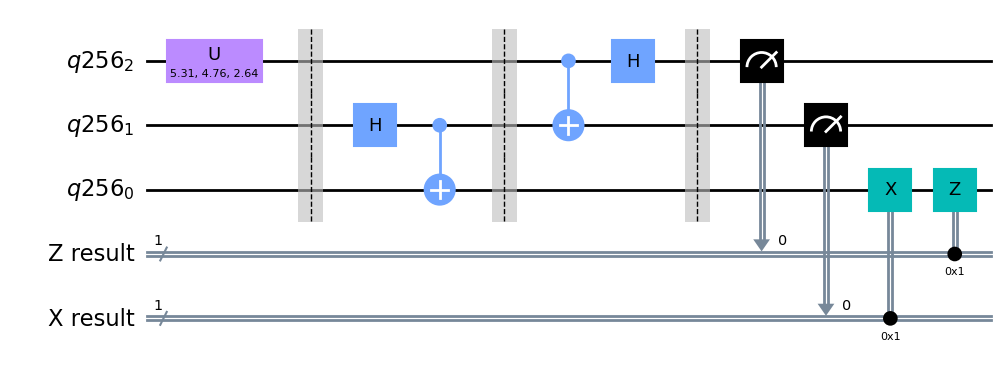

Mensaje recibido:  Statevector([ 0.        -0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.88291427-2.83966887e-16j,  0.02345708-4.68947929e-01j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j],
            dims=(2, 2, 2))


In [75]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
import random
import numpy as np

#Creamos la función
def teleportacion(theta=0, phi=0, lam=0):
    
    #Creamos el circuito de Teleportación
    teleportation_registry = QuantumRegister(3)
    result_registry_x = ClassicalRegister(1, name="X result")
    result_registry_z = ClassicalRegister(1, name="Z result")
    
    teleportation_circ = QuantumCircuit(teleportation_registry, result_registry_x, result_registry_z)
        
    #Codificamos el mensaje en el qubit 2 (primero)
    teleportation_circ.u(theta, phi, lam, teleportation_registry[2])
    
    teleportation_circ.barrier()
    teleportation_circ.h(teleportation_registry[1])
    teleportation_circ.cx(teleportation_registry[1], teleportation_registry[0])
    
    teleportation_circ.barrier()
    
    teleportation_circ.cx(teleportation_registry[2], teleportation_registry[1])
    teleportation_circ.h(teleportation_registry[2])
    teleportation_circ.barrier()
    
    teleportation_circ.measure(teleportation_registry[2], result_registry_z)
    teleportation_circ.measure(teleportation_registry[1], result_registry_x)
    
    teleportation_circ.x(teleportation_registry[0]).c_if(result_registry_x, 1)
    teleportation_circ.z(teleportation_registry[0]).c_if(result_registry_z, 1)

    return teleportation_circ


#Comprobamos el correcto funcionamiento
random.seed(0)

#Generamos el mensaje aleatoriamente
theta = random.random() * 2 * np.pi
phi = random.random() * 2 * np.pi
lam = random.random() * 2 * np.pi

#Generamos el mensaje aleatoriamente
circ = teleportacion(theta=theta, phi=phi, lam=lam)


#Mostramos el mensaje del qubit
display(circ.draw(output='mpl', reverse_bits=True))

job = execute(circ, Aer.get_backend('statevector_simulator'), shots=1)
message = job.result().get_statevector(circ)

print("Mensaje recibido: ", message)